In [2]:
import pandas as pd

In [3]:
pylab

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [44]:
%matplotlib inline
plt.style.use('seaborn-deep')


10.471675214392045


<Figure size 432x288 with 0 Axes>

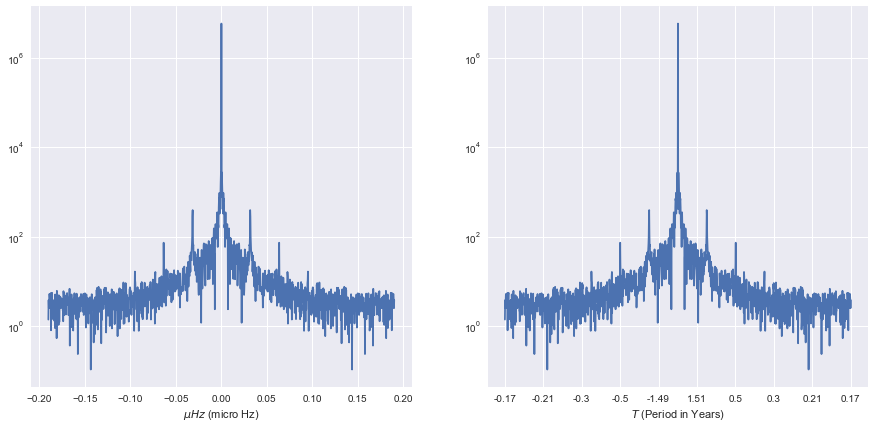

In [45]:
data = pd.read_csv("GSL_monthly.csv")['depth'][117:1537]
print(log(len(data))/log(2))
figure()
sample_rate = 1/2.628e6
from scipy.fft import fft, fftfreq, ifft
yf = fft(data.values)
xf = fftfreq(len(data), 1/sample_rate)
ind = xf.argsort()

#PLOT WITH 2 DIFFERENT SCALES, HZ/PERIOD
figure(figsize=(15,7))

subplot(121)
plt.plot((xf[ind]*1e6), np.abs(yf[ind]))
xlim_ = linspace(xf.min(),xf.max(),10)
yscale('log',fontsize=20)
xlabel("$\mu Hz$ (micro Hz)",fontsize=20)

subplot(122)
plt.plot((xf[ind]), np.abs(yf[ind]))
xlim_ = linspace(xf.min(),xf.max(),10)
xticks(ticks = xlim_, labels=np.round(1/xlim_/3600/24/365,2))
yscale('log',fontsize=20)
xlabel("$T$ (Period in Years)",fontsize=20)
plt.show()

<Figure size 432x288 with 0 Axes>

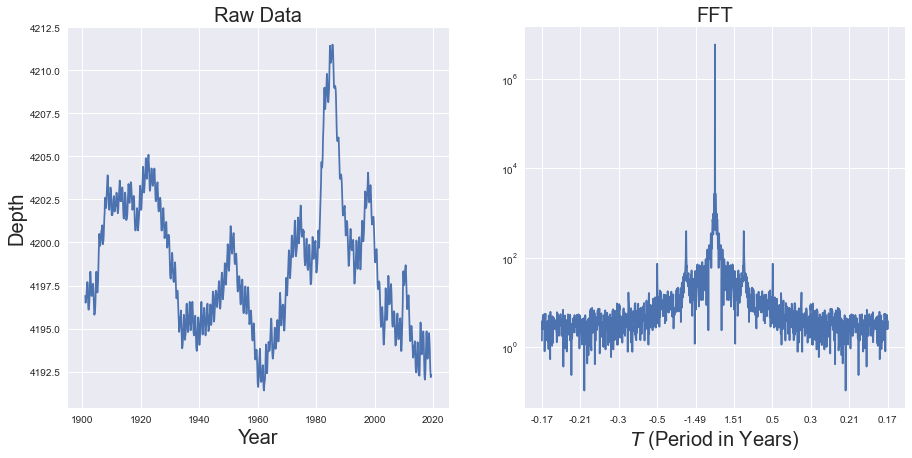

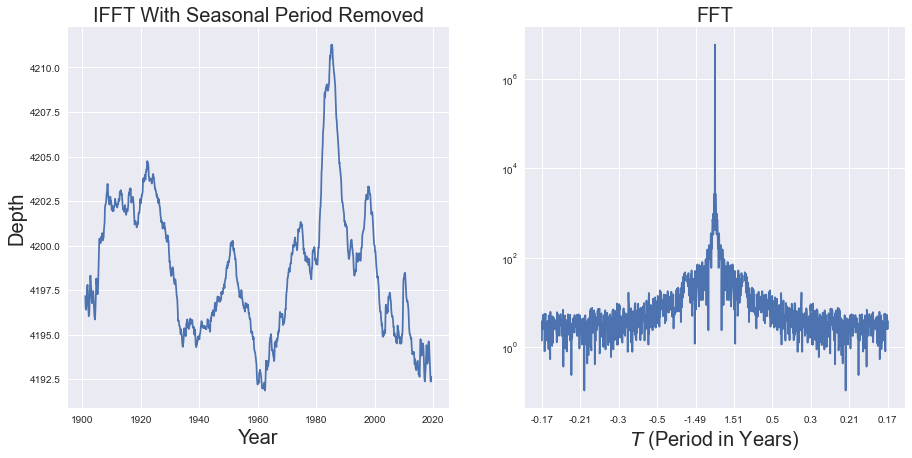

<Figure size 1080x504 with 0 Axes>

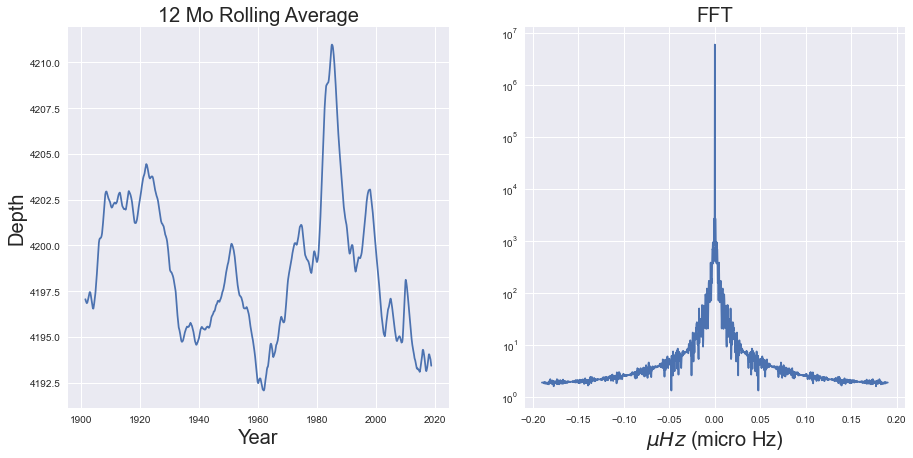

In [49]:
data = pd.read_csv("GSL_monthly.csv")['depth'][117:1537]
figure()
sample_rate = 1/2.628e6
from scipy.fft import fft, fftfreq, ifft
yf = fft(data.values)
xf = fftfreq(len(data), 1/sample_rate)
ind = xf.argsort()

figure(figsize=(15,7))

subplot(121)
title("Raw Data",fontsize=20)
plot(arange(len(data))/12+1901,data)
ylabel("Depth",fontsize=20)
xlabel("Year",fontsize=20)

subplot(122)
title("FFT",fontsize=20)
plt.plot((xf[ind]), np.abs(yf[ind]))
xlim_ = linspace(xf.min(),xf.max(),10)
xticks(ticks = xlim_, labels=np.round(1/xlim_/3600/24/365,2))
yscale('log')
xlabel("$T$ (Period in Years)",fontsize=20)
show()

yf[(abs(xf)<xf[118]+.1e-8)*(abs(xf)>xf[118]-.1e-8)]=0
yf[(abs(xf)<6.4e-8)*(abs(xf)>6.30e-8)]=0

figure(figsize=(15,7))
subplot(121)
title("IFFT With Seasonal Period Removed",fontsize=20)
plot(arange(len(data))/12+1901,real(ifft(yf)))
ylabel("Depth",fontsize=20)
xlabel("Year",fontsize=20)

yf[(abs(xf)<xf[118]+.1e-8)*(abs(xf)>xf[118]-.1e-8)]=nan
yf[(abs(xf)<6.4e-8)*(abs(xf)>6.30e-8)]=nan

subplot(122)
title("FFT",fontsize=20)
plt.plot((xf[ind]), np.abs(yf[ind]))
xlim_ = linspace(xf.min(),xf.max(),10)
xticks(ticks = xlim_, labels=np.round(1/xlim_/3600/24/365,2))
yscale('log')
xlabel("$T$ (Period in Years)",fontsize=20)
_=show()

data_ = convolve(data, np.ones(12)/12, mode='valid')
figure(figsize=(15,7))

sample_rate = 1/2.628e6
from scipy.fft import fft, fftfreq, ifft
yf = fft(data_)
xf = fftfreq(len(data_), 1/sample_rate)
ind = xf.argsort()

_=figure(figsize=(15,7))
subplot(121)
title("12 Mo Rolling Average",fontsize=20)
plot(arange(len(data))[5:-6]/12+1901,data_)
ylabel("Depth",fontsize=20)
xlabel("Year",fontsize=20)

subplot(122)
title("FFT",fontsize=20)
plt.plot((xf[ind]*1e6), np.abs(yf[ind]))
xlim_ = linspace(xf.min(),xf.max(),10)
yscale('log')
xlabel("$\mu Hz$ (micro Hz)",fontsize=20)
_=show()

Text(0.5, 0, 'Month')

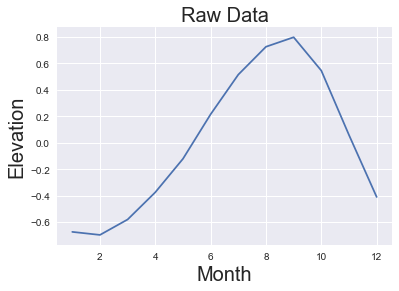

In [88]:
title("Raw Data",fontsize=20)
d = data[5:-6]-data_
plot(arange(1,13),d[7:-10].values.reshape(-1,12).mean(0))
ylabel("Elevation",fontsize=20)
xlabel("Month",fontsize=20)

In [64]:
pd.read_csv("GSL_monthly.csv")

,Unnamed: 0,PRCP,SNOW,SNWD,PRCP_US1UTBE0002,SNOW_US1UTBE0002,SNWD_US1UTBE0002,PRCP_US1UTBE0003,SNOW_US1UTBE0003,SNWD_US1UTBE0003,...,TMIN_USW00024193,TMAX_USW00024193,PRCP_USW00053167,TMIN_USW00053167,TMAX_USW00053167,PRCP_USW00094097,SNWD_USW00094097,TMIN_USW00094097,TMAX_USW00094097,depth
0,1893-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4201.700000
1,1893-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4201.900000
2,1893-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4202.000000
3,1893-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4202.400000
4,1893-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4202.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,2020-11,12.200000,3.080000,51.00,0.000000,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.966667,NaN,-50.566667,92.800000,4192.176667
1535,2020-12,7.612903,6.161290,45.70,7.785714,8.25,120.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.096774,NaN,-124.096774,4.419355,4192.190323
1536,2021-01,12.483871,5.928571,42.75,0.000000,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.483871,NaN,-102.677419,4.935484,4192.303571
1537,2021-02,0.000000,0.000000,NaN,0.000000,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.214286,NaN,-55.964286,33.107143,NaN
